# Aufwärmübung

**Inhalt:** Shapely-Shapes

**Nötige Skills**
- Basic pandas skills

**Lernziele**
- Punkte, Linien, Polygone

## Setup

In [11]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline

## Shapely

Eine Library zur mathematischen Analyse von Formen und für die Geometrie: https://shapely.readthedocs.io/en/stable/

### Point

In [2]:
x1 = 5
y1 = 5

In [3]:
punkt1 = Point(x1, y1)

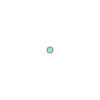

In [4]:
punkt1

### Line

In [5]:
x2a = 20
y2a = 0

x2b = 0
y2b = 20

In [6]:
linie1 = LineString([Point(x2a, y2a), Point(x2b, y2b)])

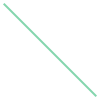

In [7]:
linie1

### Polygon

In [16]:
x3a = 0
y3a = 0

x3b = 10
y3b = 0

x3c = 10
y3c = 10

x3d = 0
y3d = 10

In [17]:
polygon1 = Polygon([[x3a, y3a], [x3b, y3b], [x3c, y3c], [x3a, y3d]])

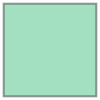

In [18]:
polygon1

### Let's plot it

In [19]:
df = pd.DataFrame({'geometry': [punkt1, linie1]})

In [20]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [21]:
gdf

geometry
0              POINT (5 5)
1  LINESTRING (20 0, 0 20)

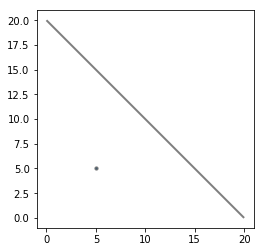

In [22]:
gdf.plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

## Your Turn

Wir spielen Picasso und zeichnen ein Haus.

**Aufgabe:** Definieren Sie ein paar Rechtecke, Linien und Punkte...

In [28]:
polygon1 = Polygon([[x3a, y3a], [x3b, y3b], [x3c, y3c], [x3a, y3d]])

In [33]:
linie2 = LineString([Point(0, 10), Point(5, 13), Point(10, 10)])

In [30]:
polygon2 = Polygon([[5, 0], [5, 3], [7, 3], [7, 0]])

In [31]:
punkt2 = Point(5.5, 1)

... fügen Sie die Objekte in ein Geodataframe und plotten Sie dieses!

In [34]:
df = pd.DataFrame({'geometry': [polygon1, linie2, polygon2, punkt2]})

In [35]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [44]:
gdf

geometry
0  POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0))
1           LINESTRING (0 10, 5 13, 10 10)
2      POLYGON ((5 0, 5 3, 7 3, 7 0, 5 0))
3                            POINT (5.5 1)

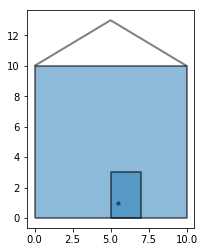

In [36]:
gdf.plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

## Eigenschaften

- Geometrie-Typ

In [13]:
polygon1.geom_type

'Polygon'

- Fläche

In [14]:
polygon1.area

100.0

- Mittelpunkt

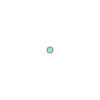

In [15]:
polygon1.centroid

- Rohdaten

In [16]:
polygon1.wkt

'POLYGON ((0 0, 10 0, 10 10, 0 10, 0 0))'

## Shapes modifizieren

### Buffer

Praktisch: Erstellt eine "Pufferzone" mit dem Radius x rund um ein Shape

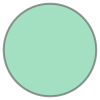

In [28]:
punkt1.buffer(3)

Können wir auch plotten:

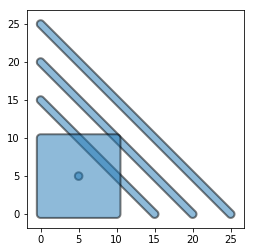

In [30]:
gdf.buffer(0.5).plot(alpha=0.5, linewidth=2, edgecolor='black', markersize=5)

### Union

Auch praktisch: Vereinigt zwei (oder mehr) Shapes zu einer einzigen Shape.

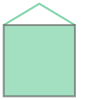

In [37]:
polygon1.union(linie2)

Um alle shapes in einem Geodataframe zusammenzufügen: `.unary_union`

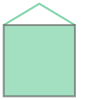

In [38]:
gdf.unary_union

Auch hier können wir wieder eine Pufferzone darumlegen...

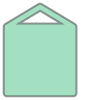

In [39]:
gdf.unary_union.buffer(0.5)

### Difference

Die "Differenz" zwischen zwei Shapes

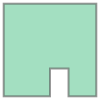

In [40]:
polygon1.difference(polygon2)

### Envelope

Ähnlich wie Buffer - ein Rechteck, das ein Objekt umhüllt

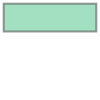

In [41]:
linie2.envelope

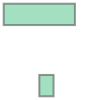

In [42]:
linie2.envelope.union(polygon2)